# Overview

Kali ini kita akan membuat sebuah project sederhana untuk menampilkan linechart yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan November 2019 dari sebuah toko retail fiksi.

Kita akan menggunakan dataset  [retail_raw_reduced.csv]('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv') yang diberikan oleh DQLab. 

Beberapa spesifikasi yang harus diperhatikan:

- Ukuran figure adalah 10x5
- Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
- Sumbu-y adalah jumlah unique customers di tiap tanggal
- Tambahkan title dan axis label

In [1]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import wget

In [2]:
# Mendownload data csv, lewati langkah ini jika sudah pernah mendowload
wget.download('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

'retail_raw_reduced (1).csv'

In [3]:
# Baca dataset retail_raw_reduced.csv dan menampilkan 5 baris teratas
dataset = pd.read_csv('retail_raw_reduced.csv')
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [4]:
# Mengecek info dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


In [5]:
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


In [6]:
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


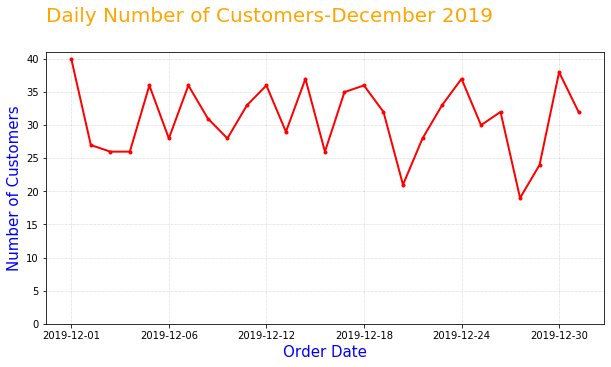

In [7]:
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers-December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.savefig('Daily Number of Customers-December 2019', quality=50) # menyimpan gambar dengan format png
plt.show()

# Penutup

Berdasarkan project sederhana diatas, kita telah melakukan beberapa langkah dasar yang diperlukan dalam membuat visualisasi data sederhana, diantaranya:
- mempersiapkan dulu data yang dibutuhkan,
- membuat plot dari data yang telah dipersiapkan,
- mengkustomisasi berbagai komponen di chart yang telah dibuat, seperti figure size, title/judul, axis labels, axis ticks, style dari line/points di chart, grid, teks, dan lain sebagainya,
- menyimpan gambar yang telah dibuat